<a href="https://colab.research.google.com/github/Moony-H/ML-Learning/blob/master/softmaxClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 새로운 인공지능 모델

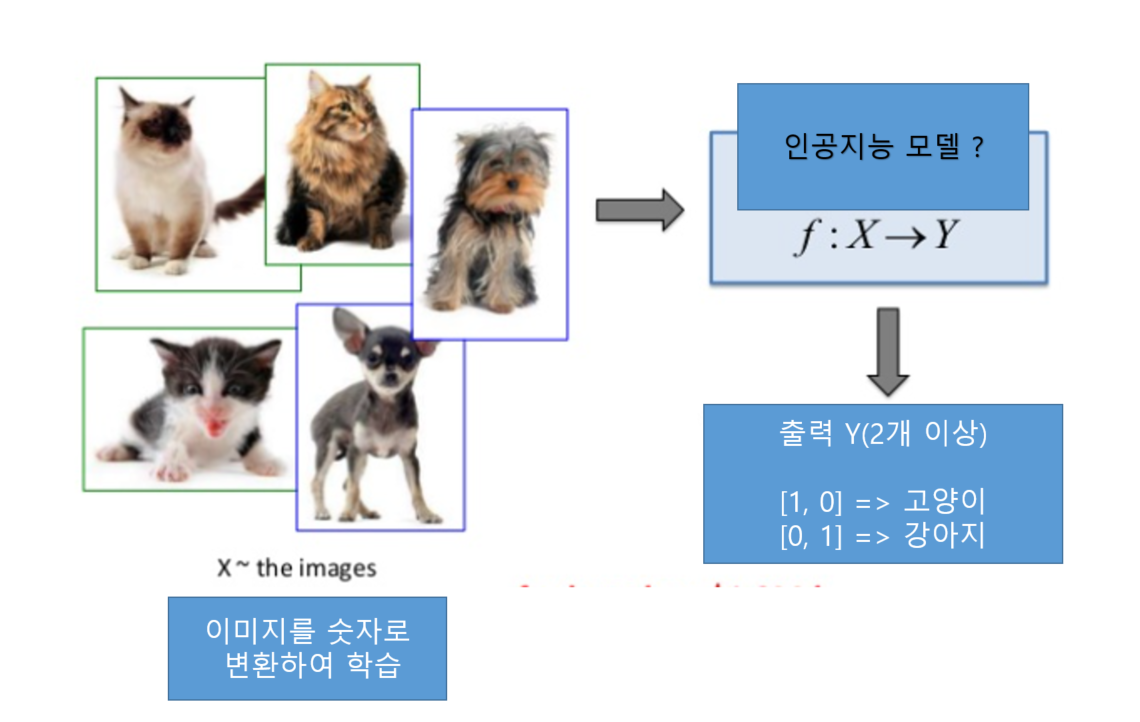

## Softmax function 정의


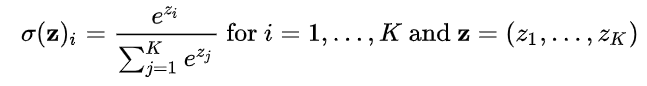

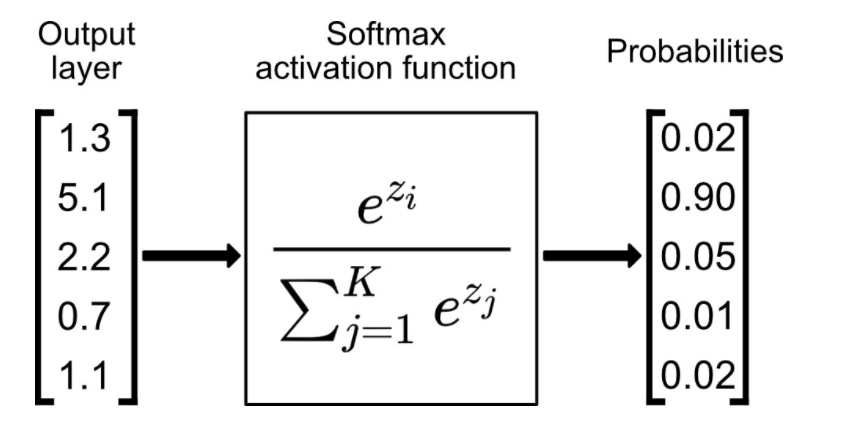

## Softmax function 계산

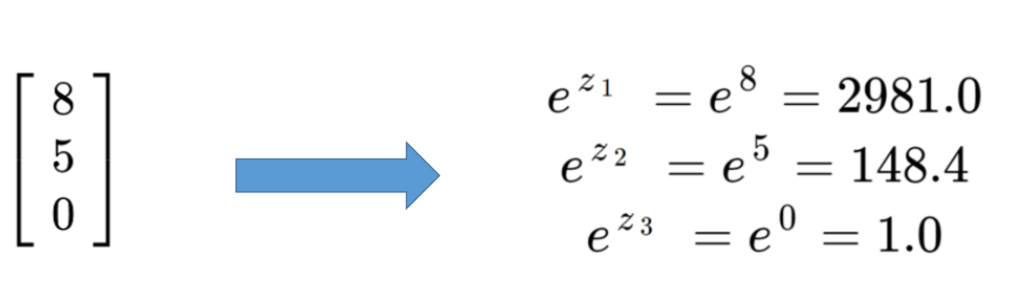


In [ ]:
import math
z1 = 8
z2 = 5
z3 = 0
print ( math.exp(z1) )




2980.9579870417283


In [ ]:
z = [z1,z2,z3]
for index in  z:
  print ( math.exp(index) )

2980.9579870417283
148.4131591025766
1.0


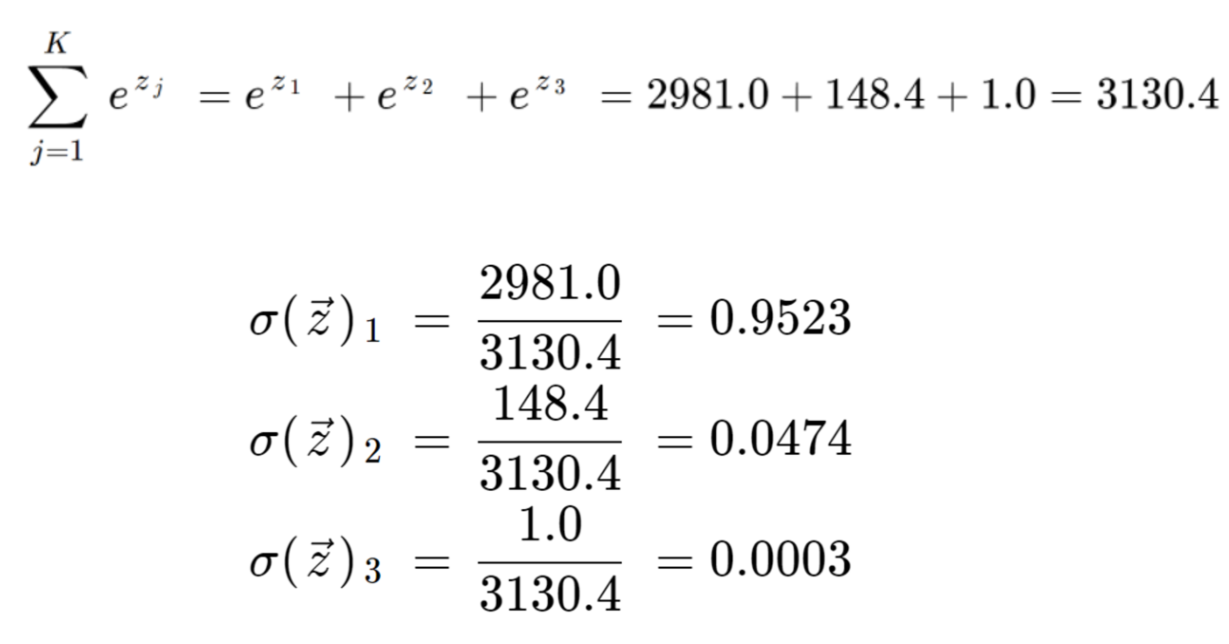

In [ ]:
import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x /e_x.sum()

scores = [8.0, 5.0, 10.0]
tmpsum = softmax(scores)
print(tmpsum)


[0.11849965 0.00589975 0.8756006 ]


In [ ]:

print(tmpsum.sum())


1.0


In [ ]:
print(np.argmax(tmpsum))

2


In [ ]:
!pip install tensorflow==1.2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 학습데이터 생성

> y_data = [1, 0, 0]  => 고양이


> y_data = [0, 1, 0]  => 강아지



> y_data = [0, 0, 1]  => 토끼


In [ ]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

## tf.placeholder 정의

In [ ]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

## Weight and Bias 정의

In [ ]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

## hypothesis 정의

> ###  tf.nn.softmax(tf.matmul(X, W) + b)




In [ ]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

## Cost 정의



> tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))



In [ ]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

## Optimizer 정의


> tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)



In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

## 학습 실행

0 8.404486
200 0.83039606
400 0.6108212
600 0.47600746
800 0.40378612
1000 0.36153567
1200 0.17257944


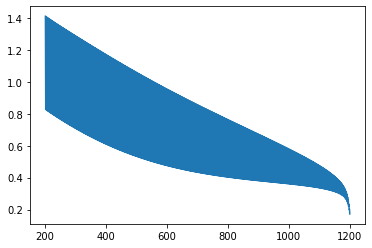

-------------- training data test only
[[9.9848050e-01 1.5194033e-03 7.3751529e-08]] [0]
-------------- testing data only
[[0.8700031  0.09402308 0.03597379]] [0]
--------------
[[4.1171129e-12 1.2488215e-04 9.9987507e-01]] [2]
--------------multi data prediction 
[[6.2204689e-02 9.3773365e-01 6.1741179e-05]
 [8.7000310e-01 9.4023079e-02 3.5973791e-02]
 [4.1171129e-12 1.2488215e-04 9.9987507e-01]] [1 0 2]


In [ ]:

X_step =[]  # X 축
Y_cost =[]  # Y 축

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(1201):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})
            if( step > 200) :
               X_step.append(step)
               Y_cost.append(cost_val)
            if step % 200 == 0:
                print(step, cost_val)

    # 여기에 그래프 코드 추가 - X축은 반복 횟수, Y축은 Cost
    plt.plot(X_step, Y_cost)
    plt.show()

    print('-------------- training data test only')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 7, 7, 7]]})
    print(a, sess.run(tf.argmax(a, 1)))


    print('-------------- testing data only')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------multi data prediction ')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))
